In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

In [15]:
from utils import implot, implotmany

In [16]:
# Config de diretórios.
path_train_csv = "lego-deffect-detection/train.csv"
path_data = "lego-deffect-detection/lego"

In [24]:
# Carregar caminhos dos arquivos e as imagens em escala de cinza pra dentro do dataframe inicial.

df = pd.read_csv(path_train_csv)

df["img"] = None
df["img_path"] = None

for i in range(len(df_init)):
    file_name = df.at[i, "example_id"]
    file_name += ".jpg"
    img_path = os.path.join(path_data, file_name)
    df.at[i, "img_path"] = img_path
    df.at[i, "img"] = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

df_init.head()

,example_id,has_deffect,no_hat,no_face,no_head,no_leg,no_body,no_hand,no_arm,img,img_path
0,adsyjmgvp,0,0,0,0,0,0,0,0,"[[57, 60, 63, 62, 59, 57, 58, 59, 58, 57, 55, ...",lego-deffect-detection/lego/adsyjmgvp.jpg
1,agmpdjsyv,1,1,1,0,1,0,0,0,"[[52, 51, 49, 48, 47, 48, 49, 50, 53, 52, 50, ...",lego-deffect-detection/lego/agmpdjsyv.jpg
2,ajgyvdsmp,0,0,0,0,0,0,0,0,"[[60, 60, 64, 65, 58, 49, 51, 59, 61, 59, 57, ...",lego-deffect-detection/lego/ajgyvdsmp.jpg
3,ajsdmvypg,0,0,0,0,0,0,0,0,"[[66, 64, 62, 59, 58, 59, 60, 61, 64, 63, 61, ...",lego-deffect-detection/lego/ajsdmvypg.jpg
4,apmjvdgys,0,0,0,0,0,0,0,0,"[[54, 53, 54, 55, 51, 47, 49, 55, 51, 49, 46, ...",lego-deffect-detection/lego/apmjvdgys.jpg


(288, 352)
D.Type: <class 'numpy.uint8'>     Img.Shape: (288, 352)     3 imgs


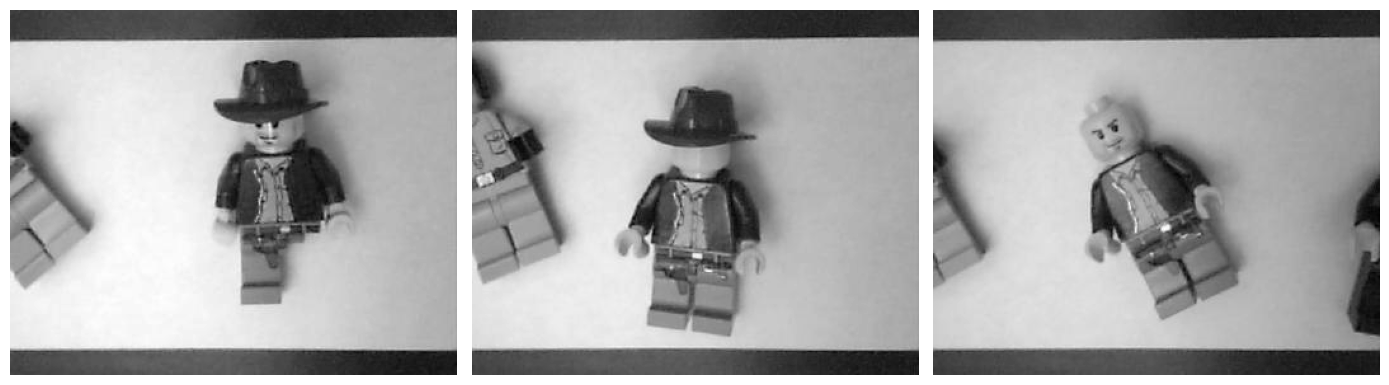

In [25]:
# Escolher tamanho da amostra e quantidade razoáveis de colunas.
n_sample = 3

# Pega amostra.
# Dataframe.sample() retorna uma série do Pandas, não lista.
# Por isso usamos .tolist()
sample = df["img"].sample(n=n_sample).tolist()

# Exibe amostra.
print(sample[0].shape)
implotmany(sample)

In [22]:
# Função para detectar objetos
def detectar_objetos(imagem_path):
    
    # 1. Ler a imagem
    imagem = cv2.imread(imagem_path)
    imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # 2. Aplicar um filtro para suavizar a imagem
    imagem_blur = cv2.GaussianBlur(imagem_gray, (5, 5), 0)

    # 3. Aplicar um limiar (threshold) para binarizar a imagem
    _, imagem_binaria = cv2.threshold(imagem_blur, 127, 255, cv2.THRESH_BINARY)

    # 4. Operações morfológicas para melhorar a segmentação
    kernel = np.ones((5, 5), np.uint8)
    imagem_morfologica = cv2.morphologyEx(imagem_binaria, cv2.MORPH_CLOSE, kernel)

    # 5. Encontrar contornos
    contornos, _ = cv2.findContours(imagem_morfologica, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 6. Desenhar contornos na imagem original
    for contorno in contornos:
        cv2.drawContours(imagem, [contorno], -1, (0, 255, 0), 2)

    # 7. Exibir a imagem resultante
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Contornos Detectados')
    plt.imshow(cv2.cvtColor(imagem_morfologica, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

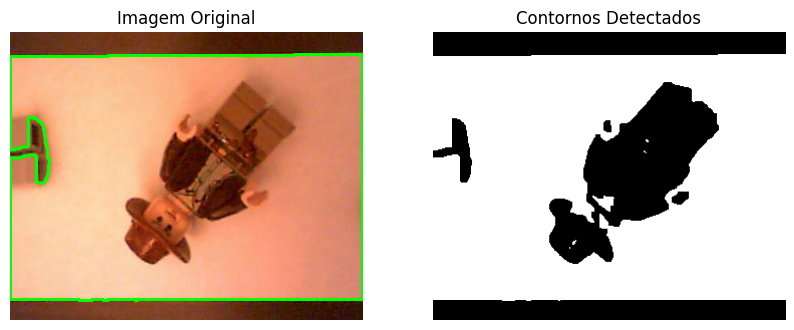

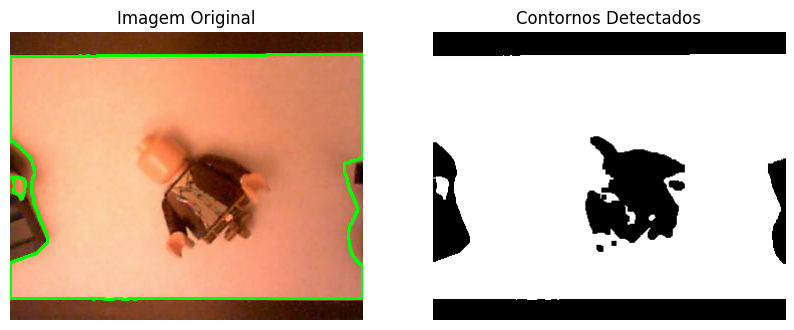

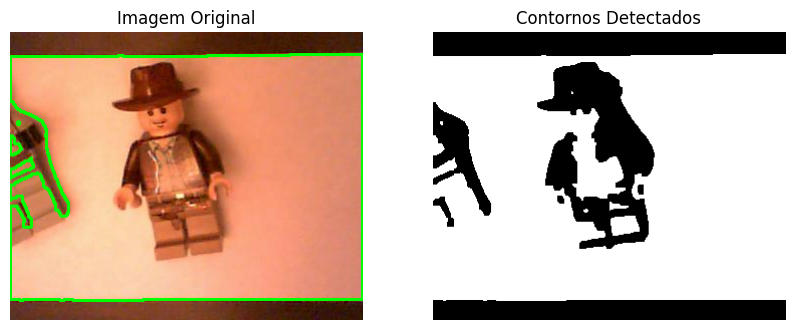

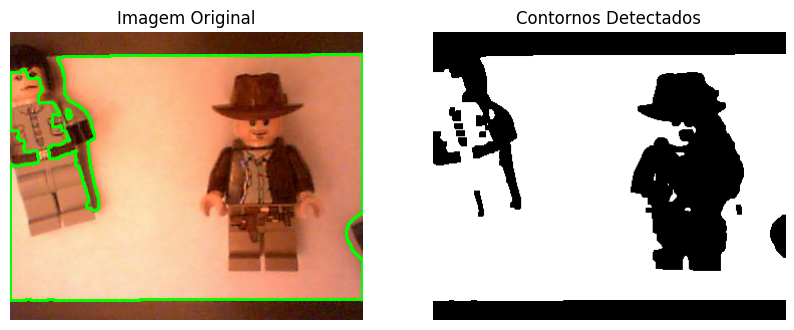

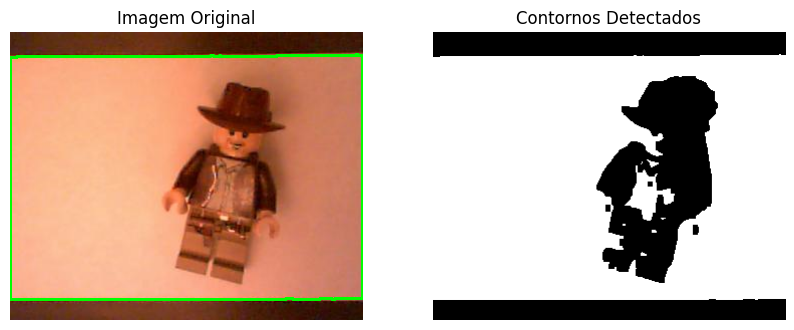

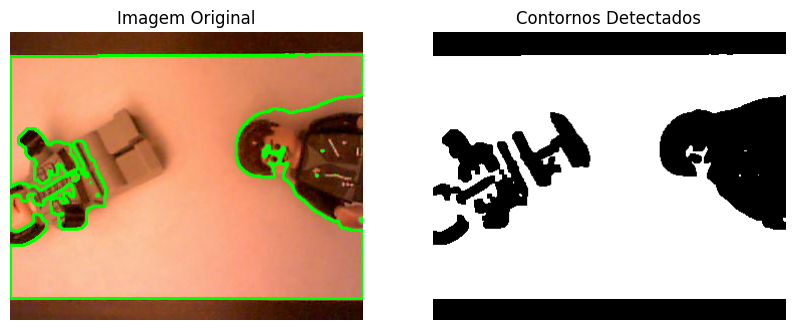

In [29]:
detectar_objetos(df["img_path"][0])
detectar_objetos(df["img_path"][1])
detectar_objetos(df["img_path"][2])
detectar_objetos(df["img_path"][3])
detectar_objetos(df["img_path"][4])
detectar_objetos(df["img_path"][5])